In [19]:
import sys
sys.path.append(r'C:\Users\KDP-50\OneDrive\바탕 화면\Python06\MyClass')
from DL_Modules import *
from DL_func import *
from DL_Reg_Class import *
from ML_preprocessing import *
from makeaplot import *

In [20]:
import os

In [21]:
FOLDER = './excels/'
TRAIN_CSV = './Project/chung_train.csv'

In [22]:
def make_dataset(dir_path, file_path):
    # 폴더 안에 파일을 가져오기
    train_files = os.listdir(dir_path)
    file_flag = True

    for file in train_files:
        print(file, dir_path+file, os.path.exists(dir_path+file))

        # 파일을 읽을 때 첫 번째 행을 건너뛰기
        with open(dir_path+file, mode='r', encoding="cp949") as f: 
            if file_flag: 
                alldata=f.read()
                file_flag = False
            else:
                f.readline()
                alldata=f.read()
            print(alldata)
        # 나머지 데이터를 지정된 파일에 저장

        with open(file_path, mode='a', encoding="utf-8") as wf:
            wf.write(alldata)

In [23]:
# make_dataset(FOLDER, 'chung_train.csv')

In [24]:
totalDF = pd.read_csv('total.csv')
totalDF.shape

(620367, 59)

In [25]:
totalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620367 entries, 0 to 620366
Data columns (total 59 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   지점                   620367 non-null  int64  
 1   일시                   620367 non-null  object 
 2   평균기온(°C)             619544 non-null  float64
 3   최저기온(°C)             620138 non-null  float64
 4   최저기온 시각(hhmi)        619944 non-null  float64
 5   최고기온(°C)             620131 non-null  float64
 6   최고기온 시각(hhmi)        619944 non-null  float64
 7   강수 계속시간(hr)          87060 non-null   float64
 8   10분 최다 강수량(mm)       146679 non-null  float64
 9   10분 최다강수량 시각(hhmi)   107002 non-null  float64
 10  1시간 최다강수량(mm)        146708 non-null  float64
 11  1시간 최다 강수량 시각(hhmi)  110432 non-null  float64
 12  일강수량(mm)             227800 non-null  float64
 13  최대 순간 풍속(m/s)        619722 non-null  float64
 14  최대 순간 풍속 풍향(16방위)    619721 non-null  float64
 15  최대 순간풍속 시각(hhmi) 

In [26]:
# check=totalDF.corr()['일강수량(mm)']

In [27]:
# check.sort_values(ascending=False)

In [28]:
totalDF.columns

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '평균 이슬점온도(°C)',
       '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)',
       '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)',
       '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
       '3.0m 지중온도(°C)', '5.0m 지중온도(°C

In [29]:
def changed_df(dataDF):
    dataDF['일시']=pd.to_datetime(dataDF['일시'])
    dataDF=dataDF[(3<=dataDF['일시'].dt.month) & (dataDF['일시'].dt.month<=5)]
    dataDF=dataDF[['일시','평균 증기압(hPa)','평균기온(°C)','최고기온(°C)','최저기온(°C)']]
    return dataDF

In [30]:
newDF = changed_df(totalDF)
newDF

,일시,평균 증기압(hPa),평균기온(°C),최고기온(°C),최저기온(°C)
60,2004-03-01,2.2,-2.8,2.3,-7.6
61,2004-03-02,1.2,-6.5,-1.8,-10.2
62,2004-03-03,1.2,-8.5,-3.7,-11.4
63,2004-03-04,1.8,-6.6,-1.3,-12.4
64,2004-03-05,3.1,-7.1,-4.3,-11.2
...,...,...,...,...,...
620148,2023-05-27,18.8,17.0,18.5,14.0
620149,2023-05-28,21.2,18.6,19.7,17.7
620150,2023-05-29,22.9,22.9,29.6,18.1
620151,2023-05-30,19.1,21.4,27.6,16.7


In [31]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155946 entries, 60 to 620152
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   일시           155946 non-null  datetime64[ns]
 1   평균 증기압(hPa)  155720 non-null  float64       
 2   평균기온(°C)     155836 non-null  float64       
 3   최고기온(°C)     155908 non-null  float64       
 4   최저기온(°C)     155906 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.1 MB


In [32]:
newDF.isnull().sum()

일시               0
평균 증기압(hPa)    226
평균기온(°C)       110
최고기온(°C)        38
최저기온(°C)        40
dtype: int64

In [33]:
newDF.shape

(155946, 5)

In [34]:
def fill_nan(dataDF, column):
    mean_value=dataDF[column].mean()
    dataDF[column]=dataDF[column].fillna(mean_value)

In [35]:
# fill_nan(newDF, '일강수량(mm)')
# fill_nan(newDF, '최소 상대습도(%)')
# fill_nan(newDF, '평균 상대습도(%)')
# fill_nan(newDF, '평균 전운량(1/10)')
fill_nan(newDF, '평균 증기압(hPa)')
fill_nan(newDF, '평균기온(°C)')
fill_nan(newDF, '최고기온(°C)')
fill_nan(newDF, '최저기온(°C)')

In [16]:
newDF.isnull().sum()

일시             0
평균 증기압(hPa)    0
평균기온(°C)       0
최고기온(°C)       0
최저기온(°C)       0
dtype: int64

In [36]:
newDF.corr()

,일시,평균 증기압(hPa),평균기온(°C),최고기온(°C),최저기온(°C)
일시,1.000000,0.090608,0.107335,0.107570,0.081919
평균 증기압(hPa),0.090608,1.000000,0.754264,0.581060,0.838754
평균기온(°C),0.107335,0.754264,1.000000,0.931718,0.898993
최고기온(°C),0.107570,0.581060,0.931718,1.000000,0.706632
최저기온(°C),0.081919,0.838754,0.898993,0.706632,1.000000


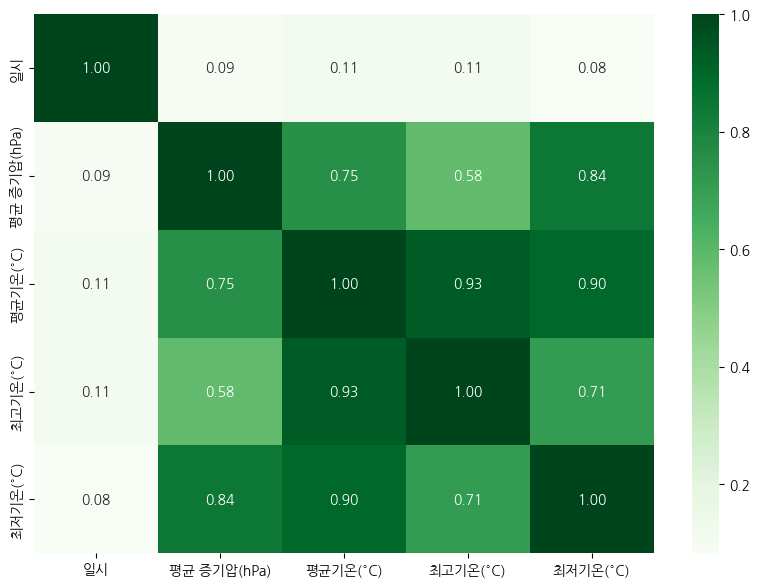

In [37]:
makeaplot.make_heatmap(newDF)

In [19]:
featureDF = newDF.drop(columns=['평균기온(°C)'])
targetDF = newDF[['일시','평균기온(°C)']]

In [20]:
idx=~(targetDF['일시'].dt.dayofyear-featureDF['일시'].dt.dayofyear==1)
print(featureDF[idx].head(2))
print(targetDF[idx].head(2))

           일시  평균 증기압(hPa)  최고기온(°C)  최저기온(°C)
60 2004-03-01          2.2       2.3      -7.6
61 2004-03-02          1.2      -1.8     -10.2
           일시  평균기온(°C)
60 2004-03-01      -2.8
61 2004-03-02      -6.5


In [21]:
targetDF=targetDF.drop(index=60)
targetDF.reset_index(inplace=True, drop=True)
featureDF.reset_index(inplace=True, drop=True)

In [22]:
featureDF.head(2)

,일시,평균 증기압(hPa),최고기온(°C),최저기온(°C)
0,2004-03-01,2.2,2.3,-7.6
1,2004-03-02,1.2,-1.8,-10.2


In [23]:
featureDF.tail(2)

,일시,평균 증기압(hPa),최고기온(°C),최저기온(°C)
155944,2023-05-30,19.1,27.6,16.7
155945,2023-05-31,18.1,27.2,15.1


In [24]:
targetDF.head(2)

,일시,평균기온(°C)
0,2004-03-02,-6.5
1,2004-03-03,-8.5


In [25]:
featureDF=featureDF.drop(index=155718)
featureDF.shape

(155945, 4)

In [26]:
targetDF.shape, featureDF.shape

((155945, 2), (155945, 4))

In [27]:
featureDF=featureDF.drop(columns=['일시'])
featureDF.head()

,평균 증기압(hPa),최고기온(°C),최저기온(°C)
0,2.2,2.3,-7.6
1,1.2,-1.8,-10.2
2,1.2,-3.7,-11.4
3,1.8,-1.3,-12.4
4,3.1,-4.3,-11.2


In [28]:
featureDF.shape

(155945, 3)

In [29]:
targetDF=targetDF.drop(columns=['일시'])
targetDF.head()

,평균기온(°C)
0,-6.5
1,-8.5
2,-6.6
3,-7.1
4,-9.2


In [30]:
targetDF.shape

(155945, 1)

In [31]:
ML_preprocessing.sScale(featureDF)

array([[-1.64901726, -2.51190234, -2.3559341 ],
       [-1.89199577, -3.15240461, -2.79271248],
       [-1.89199577, -3.44922273, -2.9943025 ],
       ...,
       [ 3.38063807,  1.75290542,  1.96145217],
       [ 2.4573197 ,  1.44046529,  1.72626382],
       [ 2.21434119,  1.37797726,  1.45747712]])

In [32]:
# - 커스텀데이터셋 인스턴스 생성
dataDS=MyDataset(featureDF, targetDF)

In [33]:
# 학습 준비
# 하이퍼 파라미터 설정

EPOCHS = 100
BATCH_SIZE = 128
LR = 0.01

BATCH_CNT = newDF.shape[0]//BATCH_SIZE
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'BATCH_CNT: {BATCH_CNT}')

BATCH_CNT: 1218


In [34]:
# model=MyRegModel(4)
model=KeyDynamicModel(3,1000,1,1000,2000,3000)

In [35]:
print(model)

KeyDynamicModel(
  (in_layer): Linear(in_features=3, out_features=1000, bias=True)
  (h_layers): ModuleList(
    (0): Linear(in_features=1000, out_features=2000, bias=True)
    (1): Linear(in_features=2000, out_features=3000, bias=True)
  )
  (out_layer): Linear(in_features=3000, out_features=1, bias=True)
)


In [36]:
# 데이터셋 인스턴스 생성
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10)

print(f'[X_train(shape): {X_train.shape} (type): {type(X_train)}], X_test: {X_test.shape}, X_val: {X_val.shape}')
print(f'[y_train(shape): {y_train.shape} (type): {type(y_train)}], y_test: {y_test.shape}, y_val: {y_val.shape}')
print(f'[y_train(value_counts()): {y_train.value_counts()/y_train.shape[0]}, y_test(value_counts()): {y_test.value_counts()/y_test.shape[0]}, y_val(value_counts()): {y_val.value_counts()/y_val.shape[0]}')

[X_train(shape): (87718, 3) (type): <class 'pandas.core.frame.DataFrame'>], X_test: (38987, 3), X_val: (29240, 3)
[y_train(shape): (87718, 1) (type): <class 'pandas.core.frame.DataFrame'>], y_test: (38987, 1), y_val: (29240, 1)
[y_train(value_counts()): 평균기온(°C)
 14.7       0.006623
 13.6       0.006612
 16.2       0.006509
 15.3       0.006361
 16.7       0.006350
              ...   
-7.1        0.000011
-7.3        0.000011
-7.4        0.000011
-7.6        0.000011
 30.1       0.000011
Name: count, Length: 359, dtype: float64, y_test(value_counts()): 평균기온(°C)
 15.3       0.007002
 17.1       0.006797
 12.5       0.006771
 14.9       0.006566
 13.4       0.006515
              ...   
-5.6        0.000026
-5.3        0.000026
-4.8        0.000026
-3.4        0.000026
 29.5       0.000026
Name: count, Length: 349, dtype: float64, y_val(value_counts()): 평균기온(°C)
 13.5       0.007182
 14.7       0.006977
 13.3       0.006874
 15.2       0.006772
 14.1       0.006703
              ...   


In [37]:
trainDS=MyDataset(X_train, y_train)
valDS=MyDataset(X_val, y_val)
testDS=MyDataset(X_test, y_test)

In [38]:
# 데이터로더 인스턴스 생성
trainDL=DataLoader(trainDS, batch_size=BATCH_SIZE)

# 최적화 인스턴스 생성
optimizer = optim.Adam(model.parameters(), lr=LR)

# 손실함수 인스턴스 생성
loss_func = nn.L1Loss()

# 성능평가 함수
score_func = R2Score()

In [39]:
# ---------------------------------------------------------------------
# 함수 이름 : training
# 함수 역할 : 배치 크기 만큼 데이터 로딩해서 학습 진행
# 매개 변수 : score_func
# ---------------------------------------------------------------------

def training():
    # 학습 모드로 모델 설정
    model.train()
    # 배치 크기 만큼 데이터 로딩해서 학습 진행
    loss_total, score_total=0,0
    for featureTS, targetTS in trainDL:

        # 학습 진행
        pre_y=model(featureTS)

        # 손실 계산
        loss=loss_func(pre_y, targetTS)
        loss_total+=loss.item()
        
        # 성능평가 계산
        score=score_func(pre_y, targetTS)
        score_total+=score.item()

        # 최적화 진행
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_total, score_total

# ---------------------------------------------------------------------
# 함수 이름 : validate
# 함수 역할 : 배치 크기 만큼 데이터 로딩해서 검증 진행
# 매개 변수 : loss_func, score_func
# ---------------------------------------------------------------------

def validate():
    # 검증 모드로 모델 설정
    model.eval()
    with torch.no_grad():
        # 검증 데이터셋
        val_featureTS=torch.FloatTensor(valDS.featureDF.values)
        val_targetTS=torch.FloatTensor(valDS.targetDF.values)
        
        # 평가
        pre_val=model(val_featureTS)

        # 손실
        loss_val=loss_func(pre_val, val_targetTS)

        # 성능평가
        score_val=score_func(pre_val, val_targetTS)
    return loss_val, score_val

In [40]:
# 저장 경로
SAVE_PATH='../Project/MyModels/'

In [41]:
loss_history, score_history=[[],[]], [[],[]]
print('TRAIN, VAL 진행')

# => 임계기준 : 10번
BREAK_CNT = 0
THESHOLD = 100

for epoch in range(1, EPOCHS):
    # 학습 모드 함수 호출
    loss_total, score_total = training()

    # 검증 모드 함수 호출
    loss_val, score_val = validate()

    # 에포크당 손실값과 성능평가값 저장
    loss_history[0].append(loss_total/len(trainDL))
    score_history[0].append(score_total/len(trainDL))

    loss_history[1].append(loss_val)
    score_history[1].append(score_val)
    
    # Loss 기준
    if len(loss_history[1]) >= 2:
        if loss_history[1][-1] >= loss_history[1][-2]: BREAK_CNT += 1
    
    # 성능이 좋은 학습 가중치 저장
    SAVE_MODEL=f'loss({loss_total/len(trainDL):.5f})_score({score_total/len(trainDL):.5f}).pth'

    if len(score_history[1]) == 1:
        # 모델 전체 저장
        torch.save(model, SAVE_PATH+SAVE_MODEL)

    else:
        if score_history[1][-1] > max(score_history[1][:-1]):
            torch.save(model, SAVE_PATH+SAVE_MODEL)

    # 학습 중단 여부 설정
    if BREAK_CNT >= THESHOLD:
        print('성능 및 손실 개선이 없어서 학습 중단')
        break

    print(f'{epoch}/{EPOCHS} => [TRAIN] LOSS: {loss_history[0][-1]} SCORE: {score_history[0][-1]}')
    print(f'\t=> [VAL] LOSS: {loss_history[1][-1]} SCORE: {score_history[1][-1]}')

TRAIN, VAL 진행
1/100 => [TRAIN] LOSS: 20.779536093289234 SCORE: -1615.1951842554804
	=> [VAL] LOSS: 2.0563244819641113 SCORE: 0.7438931465148926
2/100 => [TRAIN] LOSS: 2.0340747152056013 SCORE: 0.7315637166924102
	=> [VAL] LOSS: 1.9931883811950684 SCORE: 0.7482341527938843
3/100 => [TRAIN] LOSS: 2.0207381747206865 SCORE: 0.7344415417218
	=> [VAL] LOSS: 2.000946521759033 SCORE: 0.7496441602706909
4/100 => [TRAIN] LOSS: 2.0460154375946558 SCORE: 0.729834146906266
	=> [VAL] LOSS: 2.025822162628174 SCORE: 0.7493447065353394
5/100 => [TRAIN] LOSS: 2.0263620451657487 SCORE: 0.7333859809112271
	=> [VAL] LOSS: 2.007983446121216 SCORE: 0.7508130669593811
6/100 => [TRAIN] LOSS: 2.0372079739417694 SCORE: 0.7315902322443859
	=> [VAL] LOSS: 3.420259952545166 SCORE: 0.479445219039917
7/100 => [TRAIN] LOSS: 2.1986708625412543 SCORE: 0.6630318998942918
	=> [VAL] LOSS: 2.1208415031433105 SCORE: 0.6180044412612915
8/100 => [TRAIN] LOSS: 2.0666755774973433 SCORE: 0.7254168807417589
	=> [VAL] LOSS: 2.02756

In [157]:
# 손실함수 인스턴스 => 회귀 : MSE, MAE, RMSE, ...
reg_loss = nn.L1Loss()

# 테스트 진행
model.eval()
with torch.no_grad():
    # 테스트 데이터셋
    test_featureTS=torch.FloatTensor(testDS.featureDF.values)
    test_targetTS=torch.FloatTensor(testDS.targetDF.values)
    # 평가
    pre_test=model(test_featureTS)

    # 손실
    loss_test=reg_loss(pre_test, test_targetTS)

    # 성능평가
    score_test=R2Score()(pre_test, test_targetTS)
print(f'[TEST] LOSS: {loss_test} \n\tSCORE: {score_test}')

[TEST] LOSS: 2.1278913021087646 
	SCORE: -0.5828100442886353


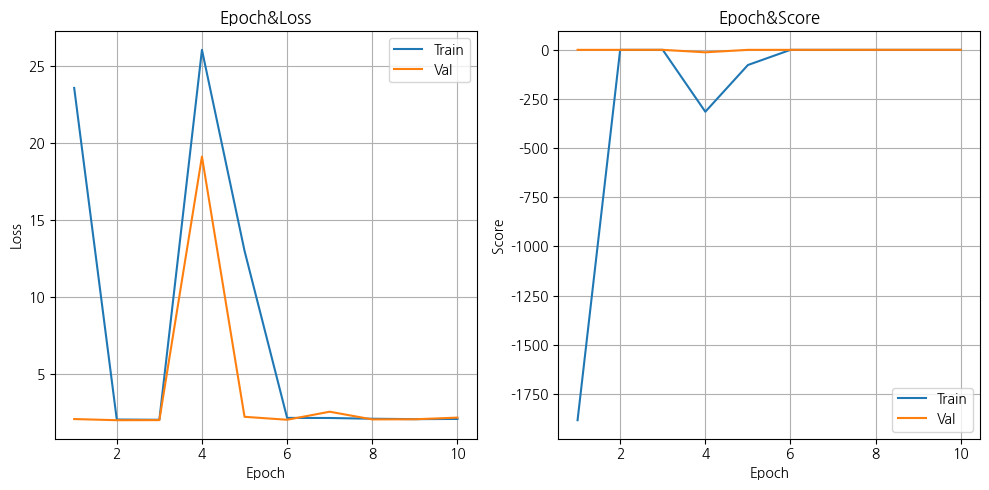

In [158]:
import makeaplot

makeaplot.loss_score_plot(loss_history, score_history, threshold=10)

In [159]:
# torch.save(model, SAVE_PATH+SAVE_FILE)